In [1]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
input_img = Input(shape=(28,28,1))

In [3]:
x = Conv2D(32, (3,3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2,2),padding="same")(x)
x = Conv2D(32, (3,3), activation="relu", padding="same")(x)
encoded = MaxPooling2D((2,2), padding="same")(x)

In [4]:
x = Conv2D(32, (3,3), activation="relu", padding="same")(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation="relu", padding="same")(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1,(3,3), activation="sigmoid", padding="same")(x)

In [5]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adadelta", loss="binary_crossentropy")

In [6]:
(x_train, _), (x_test, _) = mnist.load_data()

In [7]:
x_train = x_train/255.
x_test = x_test/255.

In [8]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [9]:
len(x_train)

60000

In [10]:
x_train = np.reshape(x_train,(len(x_train),28,28,1))
x_test = np.reshape(x_test,(len(x_test),28,28,1))

In [11]:
x_train.shape

(60000, 28, 28, 1)

In [12]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

In [13]:
x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test,0.,1.)

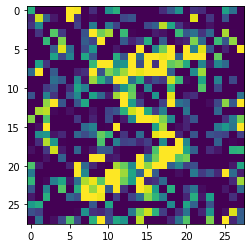

In [14]:
plt.imshow(x_train_noisy[0].reshape(28,28))
plt.show()

In [15]:
autoencoder.fit(x_train_noisy, x_train, epochs=75, batch_size=64, shuffle=True, 
                validation_data=(x_test_noisy, x_test))

Epoch 1/75
938/938 [==============================] - 142s 149ms/step - loss: 0.6836 - val_loss: 0.6611
Epoch 2/75
938/938 [==============================] - 141s 150ms/step - loss: 0.5897 - val_loss: 0.5693
Epoch 3/75
938/938 [==============================] - 137s 146ms/step - loss: 0.4924 - val_loss: 0.5439
Epoch 4/75
938/938 [==============================] - 137s 146ms/step - loss: 0.4749 - val_loss: 0.5196
Epoch 5/75
938/938 [==============================] - 652s 696ms/step - loss: 0.4575 - val_loss: 0.4905
Epoch 6/75
938/938 [==============================] - 125s 134ms/step - loss: 0.4353 - val_loss: 0.4525
Epoch 7/75
938/938 [==============================] - 134s 143ms/step - loss: 0.4043 - val_loss: 0.3999
Epoch 8/75
938/938 [==============================] - 149s 159ms/step - loss: 0.3611 - val_loss: 0.3361
Epoch 9/75
938/938 [==============================] - 147s 157ms/step - loss: 0.3093 - val_loss: 0.2790
Epoch 10/75
938/938 [==============================] - 147s 157m

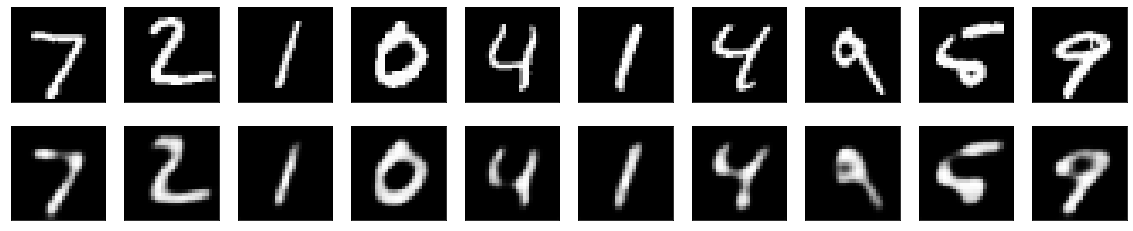

In [16]:
decoded_imgs = autoencoder.predict(x_test_noisy)
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    # display original Images
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # displaly reconstructed Images
    ax = plt.subplot(2,n,n+i+1) 
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()